 **Analyse Exploratoire des données  sur les centres de service public.**

Ce notebook est dédié à l'Analyse Exploratoire des Données (EDA) pour le fichier `centre_service.csv`.,
    "Il vise à comprendre la structure, la qualité et la distribution des données relatives aux centres de service public.

## Étape 0 : Initialisation et Configuration

In [63]:
# import de librairies necessaires
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Chargement et Exploration Initiale des Données**

In [104]:
# Charger le fichier
try:
    df_centres = pd.read_csv('../../data_raw/centres_service.csv')
except FileNotFoundError:
    print("Soucis d'imaport , veuillez verifier le chemin du fichier ")
            
df_centres = pd.read_csv('../../data_raw/centres_service.csv')

*Configurations des visualisations*

In [65]:

# 1. Style de fond et grille (Seaborn)
sns.set_style("whitegrid") 

# 2. Taille par défaut des figures (Largeur, Hauteur en pouces)
plt.rcParams['figure.figsize'] = (10, 6)

# 3. Taille de la police pour la lisibilité
plt.rcParams['font.size'] = 12

## Étape 1 : Vue d'Ensemble des Données (Structure et Types)

**Affichage des 5 premières lignes**

In [68]:

display(df_centres.head()) # Afficher les premières lignes du DataFrame
display(df_centres.tail()) # Afficher les  5 dernières lignes du DataFrame

,centre_id,nom_centre,type_centre,region,prefecture,commune,quartier,latitude,longitude,personnel_capacite_jour,nombre_guichets,heures_ouverture,horaire_nuit,equipement_numerique,date_ouverture,statut_centre
0,CT001,Centre Principal Dapaong,Principal,Savanes,Tône,Dapaong,Administratif,10.5920,0.4742,300,12,07:30-17:30,Non,Complet,2016-02-14,Actif
1,CT002,Centre Kévé,Secondaire,Maritime,Ave,Kévé,Zone industrielle,6.2815,1.2182,63,2,08:00-16:00,Non,Limite,2020-09-14,Actif
2,CT003,Centre Gando,Secondaire,Savanes,Oti-Sud,Gando,Zone industrielle,10.2629,0.2525,98,2,08:00-16:00,Non,Partiel,2015-06-02,Actif
3,CT004,Centre Pagouda,Secondaire,Kara,Binah,Pagouda,Gare routière,9.4247,1.1698,78,6,08:00-16:00,Non,Partiel,2019-12-03,Actif
4,CT005,Centre Tchamba,Secondaire,Centrale,Tchamba,Tchamba,Carrefour,8.5008,0.9988,62,3,08:00-16:00,Non,Limite,2022-10-20,Actif


,centre_id,nom_centre,type_centre,region,prefecture,commune,quartier,latitude,longitude,personnel_capacite_jour,nombre_guichets,heures_ouverture,horaire_nuit,equipement_numerique,date_ouverture,statut_centre
50,CT051,Centre Sotouboua,Secondaire,Centrale,Sotouboua,Sotouboua,Résidentiel,9.1659,0.8743,109,2,08:00-16:00,Non,Partiel,2022-05-29,Actif
51,CT052,Centre Naki-Est,Secondaire,Savanes,Kpendjal-Ouest,Naki-Est,Poste,10.6172,0.5627,106,5,08:00-16:00,Non,Partiel,2016-03-12,Actif
52,CT053,Centre Tchamba,Secondaire,Centrale,Tchamba,Tchamba,Résidentiel,8.6851,0.8158,45,5,08:00-16:00,Non,Partiel,2023-12-05,Actif
53,CT054,Centre Principal Sokodé,Principal,Centrale,Tchaoudjo,Sokodé,Poste,8.6473,1.0778,248,12,07:30-17:30,Non,Complet,2020-12-15,Actif
54,CT055,Centre Notsé,Secondaire,Plateaux,Haho,Notsé,Gare routière,7.1331,0.7312,85,2,08:00-16:00,Non,Partiel,2020-07-25,Actif


**Dimensions du DataFrame**

In [10]:
df_centres.shape

(55, 16)

On constaque qu'il y a 55 enregistrement et 16 colonnes ou attributs

**Informations Générales sur le DataFrame**

In [8]:
df_centres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   centre_id                55 non-null     object 
 1   nom_centre               55 non-null     object 
 2   type_centre              55 non-null     object 
 3   region                   55 non-null     object 
 4   prefecture               55 non-null     object 
 5   commune                  55 non-null     object 
 6   quartier                 55 non-null     object 
 7   latitude                 55 non-null     float64
 8   longitude                55 non-null     float64
 9   personnel_capacite_jour  55 non-null     int64  
 10  nombre_guichets          55 non-null     int64  
 11  heures_ouverture         55 non-null     object 
 12  horaire_nuit             55 non-null     object 
 13  equipement_numerique     55 non-null     object 
 14  date_ouverture           55 

**Le dataset presente au total 55 enregistrement dont 16 variable** : centre_id (identifiant unique), nom_centre, type_centre, region, prefecture, commune, quartier (localisations), latitude, longitude (coordonnées géographiques).  

**Types de données :**

La majorité (12 colonnes) sont de type object (catégoriel ou textuel).

date_ouverture, heure_ouverture,horaire_nuit  sont actuellement des  objects donc  Il faudrait les convertir en type datetime pour faire une analyse temporelle.

latitude et longitude sont des flottants, parfaits pour une cartographie

**Colonnes numériques**


In [36]:
#Obtenir les colonnes numeriques
numeric_cols = df_centres.select_dtypes(include=['number']).columns
print( "Les colonnes numeriques sont: ",numeric_cols.to_list())


Les colonnes numeriques sont:  ['latitude', 'longitude', 'personnel_capacite_jour', 'nombre_guichets']


## Étape 2 : Résumé Statistique et Détection des Anomalies Numériques**

**Statistiques Descriptives des Variables Numériques**

In [14]:
print(df_centres.describe())

        latitude  longitude  personnel_capacite_jour  nombre_guichets
count  55.000000  55.000000                55.000000        55.000000
mean    8.345384   1.061744               126.418182         5.327273
std     1.492890   0.336674                95.720599         3.564509
min     6.214500   0.098700                32.000000         2.000000
25%     6.587650   0.844950                63.000000         2.000000
50%     8.685100   1.131300                88.000000         5.000000
75%     9.422350   1.300600               116.500000         6.000000
max    11.002200   1.680600               358.000000        14.000000


**2.1.Analyse de la Capacité et des Guichets (Opérationnel)**
C'est ici que l'on trouve les informations les plus intéressantes sur le fonctionnement des centres :

* **Une forte disparité (Hétérogénéité) :** * **On constate que** la capacité moyenne est de **126 personnes/jour**, mais l'écart-type (`std`) est très élevé (**95**). Cela signifie que les centres n'ont pas tous la même taille et sont très diversifiés.
    * **On constate que** l'amplitude est large, passant d'un minimum de **32** à un maximum de **358**.

* **Présence d'Outliers (Valeurs atypiques) :**
    * **On constate que** 75% des centres accueillent moins de **116** personnes, alors que le maximum grimpe à **358**.
    * **Conclusion :** Il existe quelques "très grands centres" bien au-dessus de la norme. Il faudra les identifier individuellement, car ils représentent des points névralgiques (souvent situés dans les capitales ou grandes communes) cela peut aider à aloué mieux les ressources dans ces zones 

* **Les Guichets :**
    * **On constate que** la moitié des centres (**50%**) disposent de **5 guichets ou moins**.
    * **On constate que** le ratio moyen est d'environ **23 personnes par guichet** (calculé par $126 / 5.3$). C'est un indicateur de performance clé pour évaluer la fluidité du service.

---

**2.2 Analyse Géographique (Latitude / Longitude)**
Les coordonnées géospatiales permettent de délimiter la zone d'étude :

* **Latitude :** Elle s'étend de **6.21 à 11.00**, ce qui représente une couverture Nord-Sud assez vaste, soit environ 500 à 600 km.
* **Longitude :** Elle s'étend de **0.09 à 1.68**, indiquant une zone Est-Ouest très étroite.
* **Observation :** On constate que les données correspondent géographiquement à la forme du **Togo**, pays caractérisé par son étirement vertical.

On peut grace à cette description cartographier ces points pour visualiser la densité des centres par région.

**Analyse des Variables Catégorielles**

In [74]:
# lister les variable categorielle
categorical_cols = df_centres.select_dtypes(include=['object', 'category']).columns.difference(['heures_ouverture', 'date_ouverture', 'horaire_nuit',"centre_id"])
print("Les colonnes catégorielles sont: ",categorical_cols.to_list())
#Parcourir les colonnes catégorielles et afficher les valeurs uniques et leurs comptes
for col in categorical_cols:
    #print(f"\nValeurs uniques pour la colonne '{col}':")
    print(df_centres[col].value_counts())


Les colonnes catégorielles sont:  ['commune', 'equipement_numerique', 'nom_centre', 'prefecture', 'quartier', 'region', 'statut_centre', 'type_centre']
commune
Sokodé           5
Tchamba          5
Aného            4
Lomé             3
Djarkpanga       3
Kévé             3
Dapaong          2
Naki-Est         2
Vogan            2
Tandjouaré       2
Guérin-Kouka     2
Sotouboua        2
Kara             2
Kpalimé          2
Tsévié           2
Pagouda          2
Niamtougou       1
Tabligbo         1
Kanté            1
Mandouri         1
Amlamé           1
Bafilo           1
Blitta-Gare      1
Danyi-Apéyémé    1
Tohoun           1
Bassar           1
Gando            1
Notsé            1
Name: count, dtype: int64
equipement_numerique
Partiel    31
Complet    12
Limite     12
Name: count, dtype: int64
nom_centre
Centre Tchamba              5
Centre Aného                4
Centre Principal Sokodé     4
Centre Kévé                 3
Centre Djarkpanga           3
Centre Guérin-Kouka         2
Ce

## Étape 3 : Identification et Traitement Préliminaire des Valeurs Manquantes et des Doublons

**1-Vérification des Valeurs Manquantes**

In [15]:
print(df_centres.isnull().sum())

centre_id                  0
nom_centre                 0
type_centre                0
region                     0
prefecture                 0
commune                    0
quartier                   0
latitude                   0
longitude                  0
personnel_capacite_jour    0
nombre_guichets            0
heures_ouverture           0
horaire_nuit               0
equipement_numerique       0
date_ouverture             0
statut_centre              0
dtype: int64


***Commentaire :*** Il y a pas de donnée manquante dans ce dataset

In [79]:
# Pourcentage des valeurs manquantes par colonne
missing_percentage = df_centres.isnull().sum() / len(df_centres) * 100
print(missing_percentage)

#Pourcenta

centre_id                  0.0
nom_centre                 0.0
type_centre                0.0
region                     0.0
prefecture                 0.0
commune                    0.0
quartier                   0.0
latitude                   0.0
longitude                  0.0
personnel_capacite_jour    0.0
nombre_guichets            0.0
heures_ouverture           0.0
horaire_nuit               0.0
equipement_numerique       0.0
date_ouverture             0.0
statut_centre              0.0
dtype: float64


Le dataset ne contient pas de valeurs manquantes 

**2. Identification des Doublons**

In [25]:
if df_centres.duplicated().sum() > 0:
    print("Il y a un total de "+ str(df_centres.duplicated().sum()) + " lignes dupliquées dans le DataFrame df_centres.")
else:
    print("Il n'y a pas de lignes dupliquées dans le dataset.")

Il n'y a pas de lignes dupliquées dans le dataset.


## Étape 4 : Analyse des Principales Distributions et Détection des Outliers

**@.Distributions des Variables Numériques**

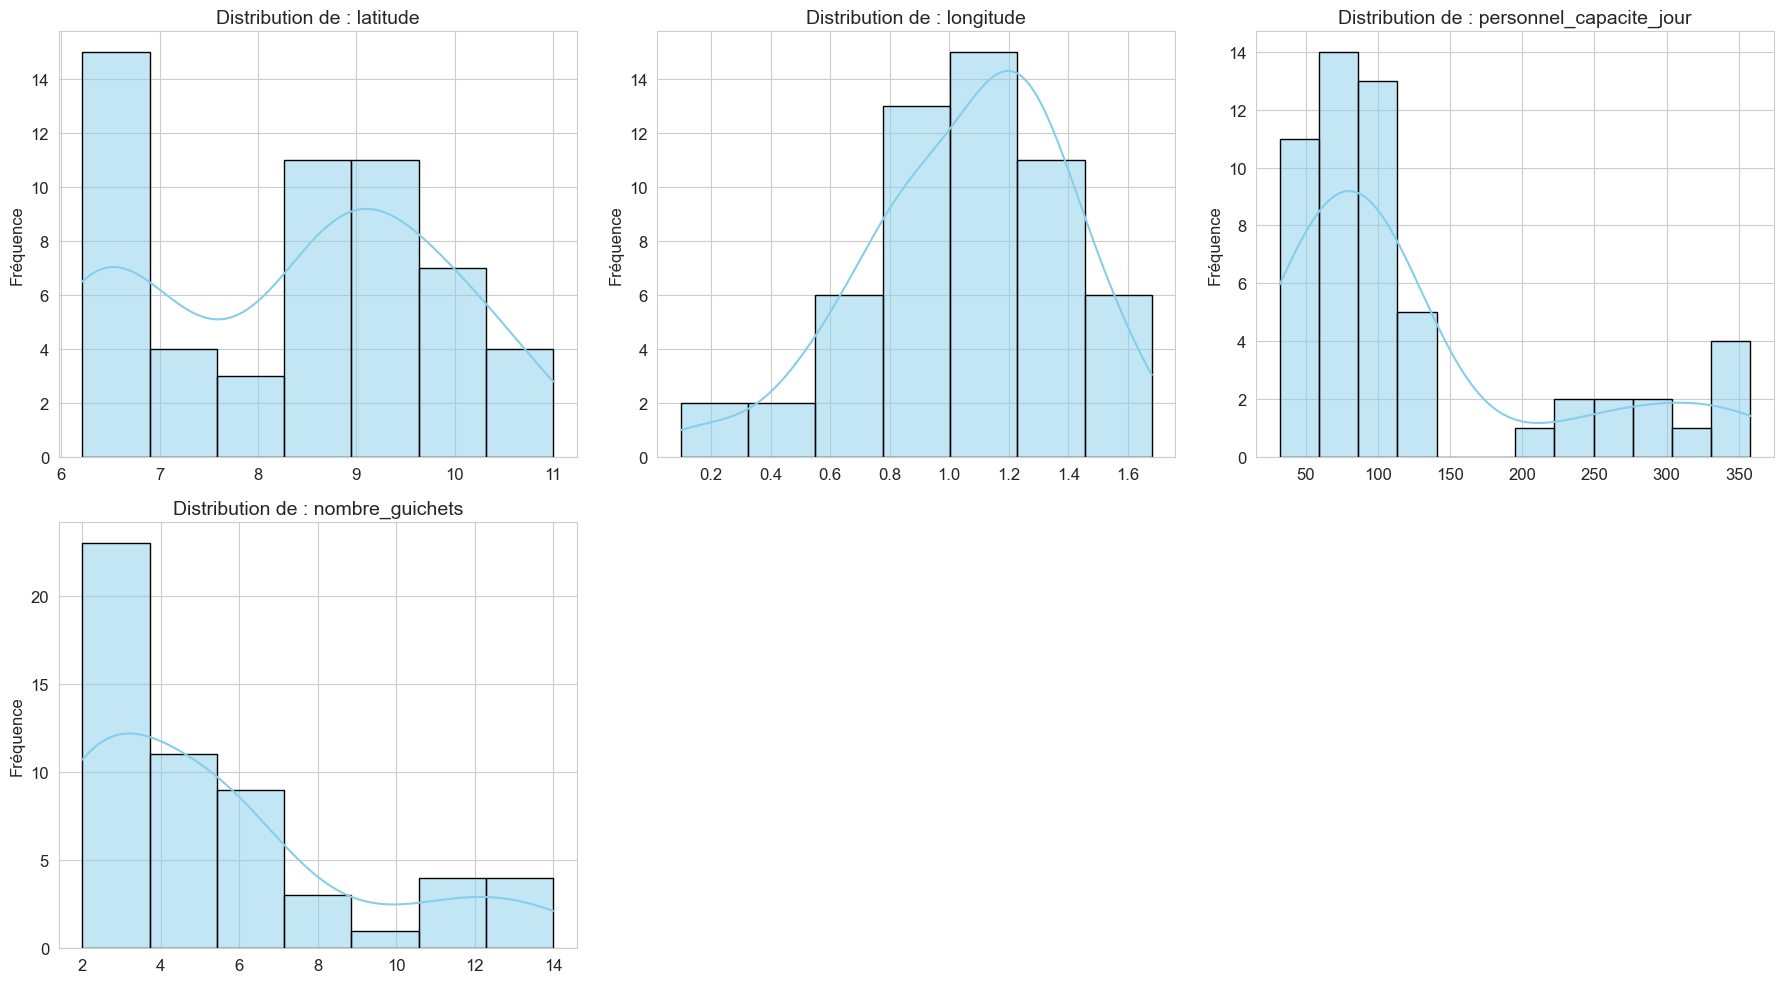

In [81]:
# 1. Liste des colonnes numériques à analyser
cols_numeriques = numeric_cols
# Enlever l'id si présent dans les colonnes numériques
cols_numeriques = cols_numeriques.drop('centre_id', errors='ignore') # Ce n'est pas une variable numérique à analyser et elle n'est pas numerique ici 

# 2. Configuration de la grille (ex: 2 lignes, 3 colonnes)
n_cols = 3
n_rows = (len(cols_numeriques) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten() # Convertit la matrice d'axes en liste simple

# 3. Boucle de génération des graphiques
for i, col in enumerate(cols_numeriques):
    sns.histplot(df_centres[col], kde=True, ax=axes[i], color="skyblue", edgecolor="black")
    axes[i].set_title(f'Distribution de : {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Fréquence')

# 4. Supprimer les axes vides si le nombre de colonnes est impair
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**1\. Variables Géographiques : Localisation des activités**

*   **Latitude (Bimodale) :** On constate clairement **deux pics majeurs**. Un premier groupe se situe autour de **6.5** et un second, plus large, entre **8.5 et 10**.
    
    *   _Interprétation :_ Vos données ne sont pas réparties uniformément sur le territoire. Il existe deux pôles géographiques distincts (probablement une zone Sud et une zone Nord/Centre).
        
*   **Longitude (Unimodale / Quasi-normale) :** La distribution suit presque une courbe de Gauss centrée autour de **1.1 - 1.2**.
    
    *   _Interprétation :_ La majorité des points sont concentrés sur un axe Est-Ouest assez serré, avec peu de dispersion aux extrémités ($0.2$ ou $1.6$).
        

** 2\. Capacité et Ressources : Une asymétrie marquée**

*   **Personnel Capacité Jour (Asymétrie positive) :** La distribution est fortement **asymétrique à droite** (skewed). La majorité des sites ont une capacité entre **50 et 120**. Cependant, on note la présence de **valeurs extrêmes (outliers)** au-delà de 200, allant jusqu'à 350.
    
    *   _Interprétation :_ Le réseau est composé d'une multitude de petites structures et de quelques rares "hubs" ou centres principaux à très haute capacité.
        
*   **Nombre de Guichets (Asymétrie positive) :** On observe un pic massif pour les petites unités (**2 à 4 guichets**). La fréquence diminue rapidement à mesure que le nombre de guichets augmente. On note un petit rebond (pic secondaire) entre **11 et 14**.
    
    *   _Interprétation :_ Il y a une standardisation des petits guichets, mais les sites de grande taille (12-14 guichets) forment une catégorie à part qu'il faudra peut-être analyser séparément.

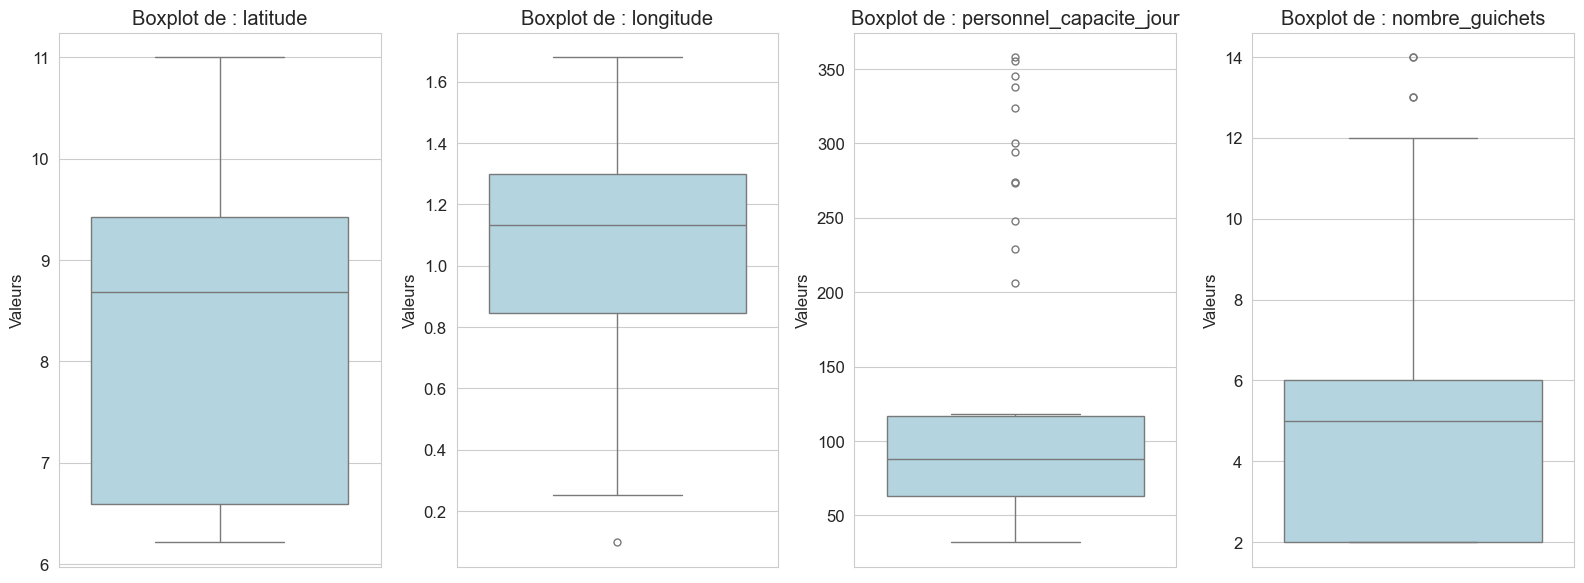

In [84]:


# Variables à inspecter
cols_box = ['latitude', 'longitude', 'personnel_capacite_jour', 'nombre_guichets']

plt.figure(figsize=(16, 6))

for i, col in enumerate(cols_box):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df_centres[col], color="lightblue", fliersize=5)
    plt.title(f'Boxplot de : {col}')
    plt.ylabel('Valeurs')

plt.tight_layout()
plt.show()

 **1\. Confirmation des Valeurs Aberrantes (Outliers)**

L'implication la plus directe concerne les variables de performance et de ressources :

*   **Personnel & Capacité :** On observe une **accumulation massive de points** au-dessus de la moustache supérieure (entre 200 et 350). Cela implique que votre dataset contient des "Super-Centres". Ces points ne sont pas des erreurs, mais des entités dont le comportement statistique diffère totalement de la moyenne.
    
*   **Nombre de Guichets :** Deux points se détachent nettement au sommet (13 et 14). Ils représentent des structures exceptionnelles par rapport à la norme qui se situe entre 2 et 6.
    
*   **Longitude :** Un seul point apparaît tout en bas (proche de 0.1). C'est un **outlier géographique** qui mérite d'être vérifié : est-ce une agence isolée ou une erreur de saisie ?
    

 **2\. Analyse de l'Asymétrie (Skewness)**

La forme des boîtes confirme ce que les histogrammes laissaient présager :

*   **Asymétrie Positive :** Pour le personnel et les guichets, la ligne de la médiane (au centre de la boîte) est plus proche du bas de la boîte.
    
    *   **Implication :** La moyenne sera "tirée" vers le haut par les gros centres et ne représentera pas bien l'agence "typique". Pour vos rapports, la **médiane** sera une mesure de tendance centrale beaucoup plus fiable.
        

 **3\. Dispersion et Étendue**

*   **Latitude :** La boîte est très large et couvre presque toute l'étendue entre les moustaches. Cela implique une **grande dispersion géographique** Nord-Sud sans concentration excessive sur une seule valeur.
    
*   **Longitude :** La boîte est plus compacte, ce qui implique que la majorité de vos données sont regroupées sur une bande Est-Ouest relativement étroite.

**@. Distributions des Variables Catégorielles**

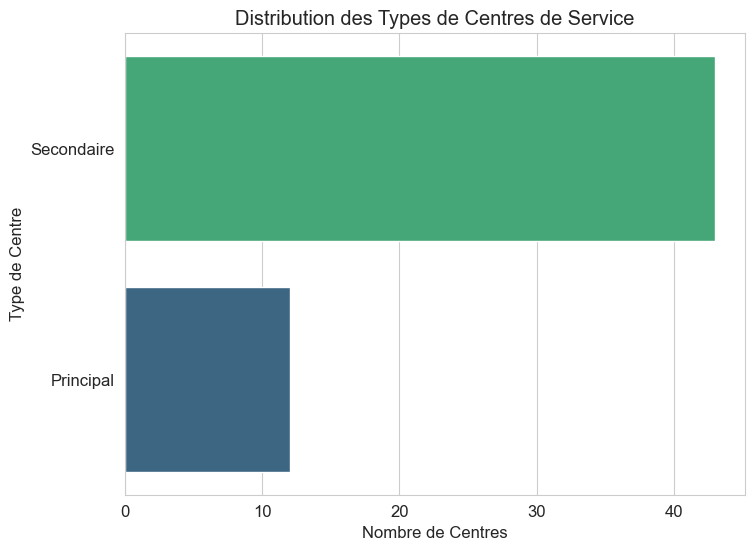

In [ ]:
#Nombre de guichet par centre de service
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_centres, y='type_centre', order=df_centres['type_centre'].value_counts().index, hue='type_centre', palette='viridis')
if ax.get_legend() is not None:
    ax.get_legend().remove()
plt.title('Distribution des Types de Centres de Service')
plt.xlabel('Nombre de Centres')
plt.ylabel('Type de Centre')
plt.show()



La majorité des centres sont des centres secondaire 

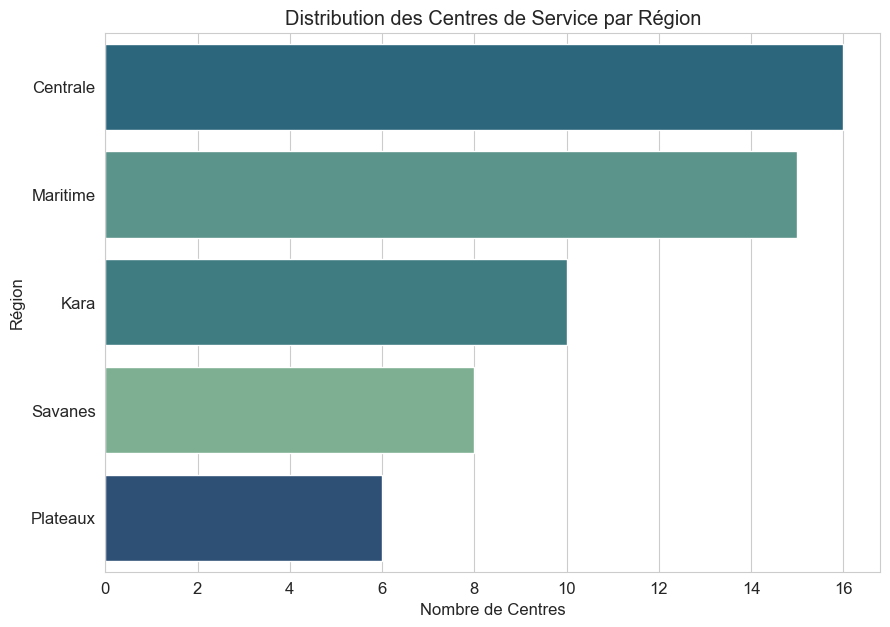

In [94]:
# Visualisation 4.2 : Distribution des Centres par Région
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=df_centres, y='region', order=df_centres['region'].value_counts().index, hue='region', palette='crest')
if ax.get_legend() is not None:
    ax.get_legend().remove()
plt.title('Distribution des Centres de Service par Région')
plt.xlabel('Nombre de Centres')
plt.ylabel('Région')
plt.show()

On constate un grand nombre de centres dans la region centrale et la region maritime.Peut être par ce qu'il y a plus de demandes dans ces regions ou une grande concentrations de la population ou un axe particulier de la repartitions territorial des centres 

**Nombre de centre Principaux par region**

C:\Users\RIG\AppData\Local\Temp\ipykernel_15064\1186638846.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_primary_counts.values, y=region_primary_counts.index, palette='magma')


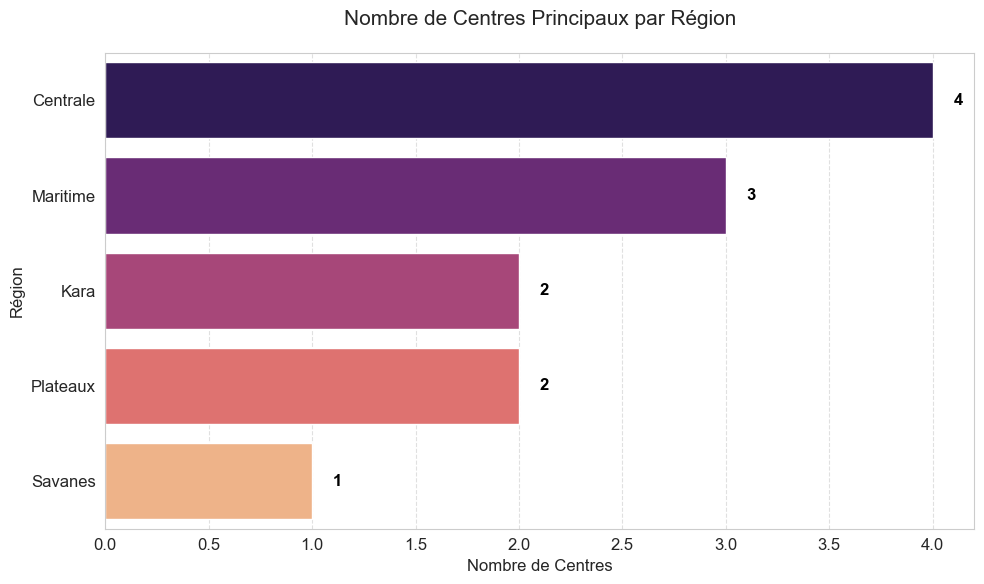

In [100]:


# 1. Préparation des données (votre calcul trié pour le graphique)
region_primary_counts = df_centres[df_centres['type_centre'] == 'Principal'].groupby('region').size().sort_values(ascending=False)

# 2. Création de la figure
plt.figure(figsize=(10, 6))
sns.barplot(x=region_primary_counts.values, y=region_primary_counts.index, palette='magma')

# 3. Personnalisation pour un rapport professionnel
plt.title('Nombre de Centres Principaux par Région', fontsize=15, pad=20)
plt.xlabel('Nombre de Centres', fontsize=12)
plt.ylabel('Région', fontsize=12)

# Ajout des chiffres exacts au bout de chaque barre
for i, v in enumerate(region_primary_counts.values):
    plt.text(v + 0.1, i, str(v), va='center', fontweight='bold', color='black')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

On constate que  la region central a plus de Centres principaux suivi de la region maritime 
Autrement dit les regions à faible nombre de centre principaux on moins de centre secondaire et vice-versa
La region des palteaux et la region des savanes ont un nombre faible de centre principaux (2 et 1)

C:\Users\RIG\AppData\Local\Temp\ipykernel_15064\3985964060.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_primary_counts.values, y=region_primary_counts.index, palette='magma')


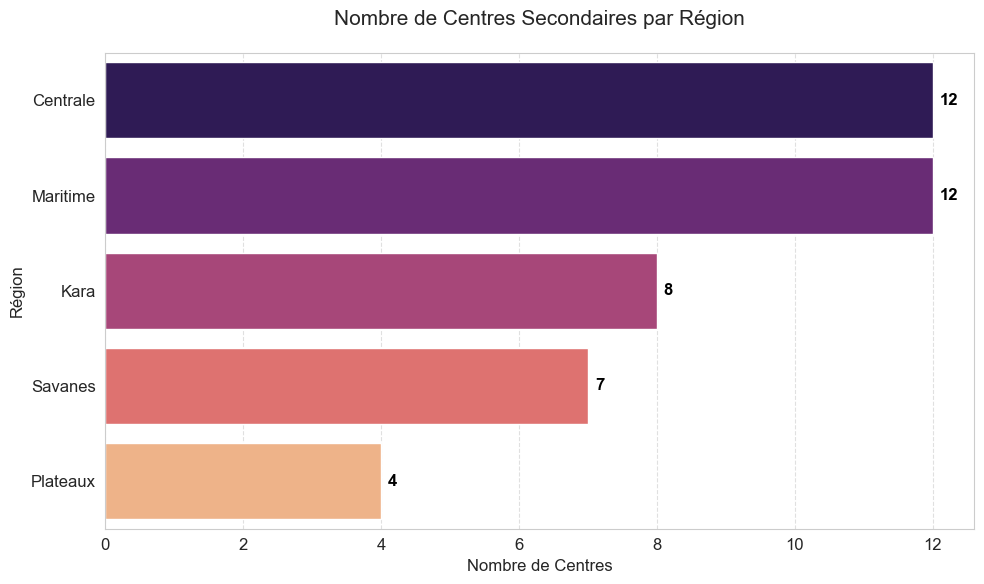

In [102]:


# 1. Préparation des données (votre calcul trié pour le graphique)
region_primary_counts = df_centres[df_centres['type_centre'] == 'Secondaire'].groupby('region').size().sort_values(ascending=False)

# 2. Création de la figure
plt.figure(figsize=(10, 6))
sns.barplot(x=region_primary_counts.values, y=region_primary_counts.index, palette='magma')

# 3. Personnalisation pour un rapport professionnel
plt.title('Nombre de Centres Secondaires par Région', fontsize=15, pad=20)
plt.xlabel('Nombre de Centres', fontsize=12)
plt.ylabel('Région', fontsize=12)

# Ajout des chiffres exacts au bout de chaque barre
for i, v in enumerate(region_primary_counts.values):
    plt.text(v + 0.1, i, str(v), va='center', fontweight='bold', color='black')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Le nombre de centre secondaire est proportionel au nombre de centre principaux 

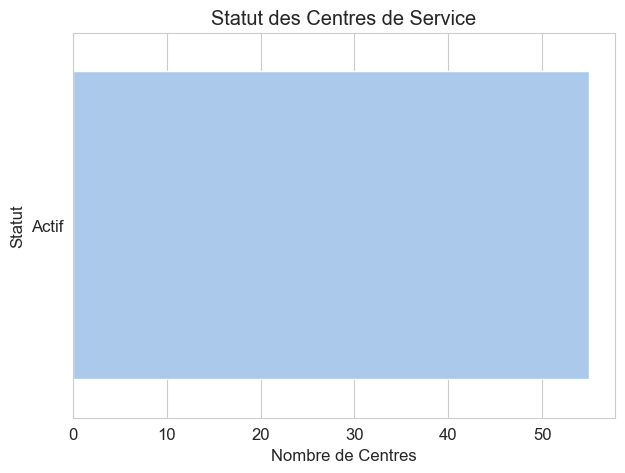

In [95]:
# Visualisation 4.5 : Statut des Centres
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df_centres, y='statut_centre', hue='statut_centre', palette='pastel')
if ax.get_legend() is not None:
    ax.get_legend().remove()
plt.title('Statut des Centres de Service')
plt.xlabel('Nombre de Centres')
plt.ylabel('Statut')
plt.show()

Tous les centre sont actif au heures de demande 

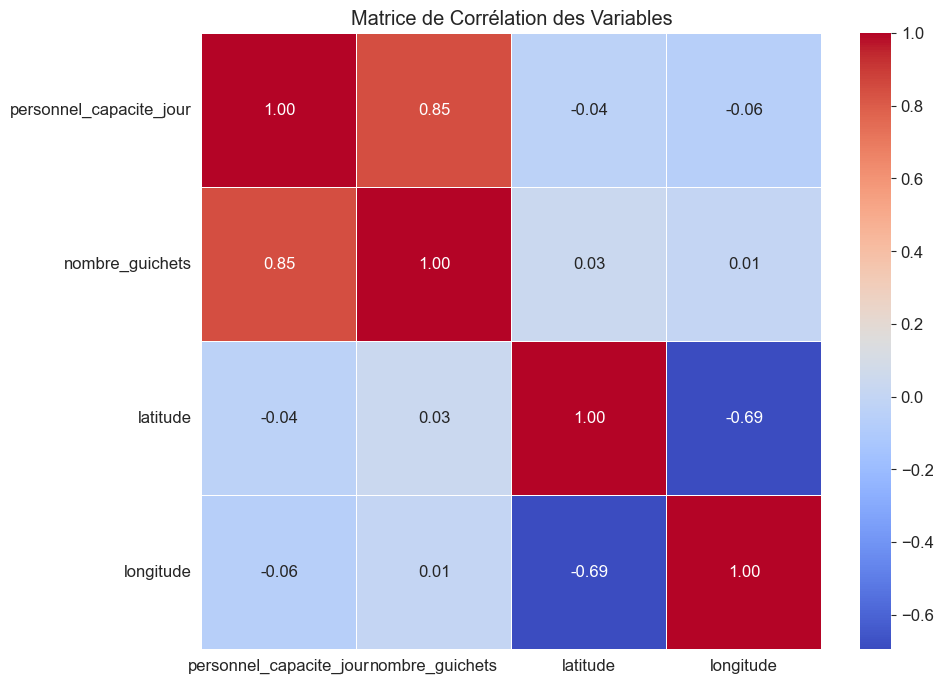

In [ ]:
# Calcul de la corrélation
corr = df_centres[['personnel_capacite_jour', 'nombre_guichets', 
        'latitude', 'longitude']].corr()

# Affichage de la Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de Corrélation des Variables')
plt.show()

**Répartition géographique des 55 centres.**

In [42]:
df_centres['region'].value_counts()

region
Centrale    16
Maritime    15
Kara        10
Savanes      8
Plateaux     6
Name: count, dtype: int64

**Pourcentage de chaque type de centre.**

In [39]:
df_centres['type_centre'].value_counts(normalize=True)

type_centre
Secondaire    0.781818
Principal     0.218182
Name: proportion, dtype: float64

C:\Users\RIG\AppData\Local\Temp\ipykernel_15064\3223967051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_centres, y='prefecture', order=df_centres['prefecture'].value_counts().index, palette='crest')


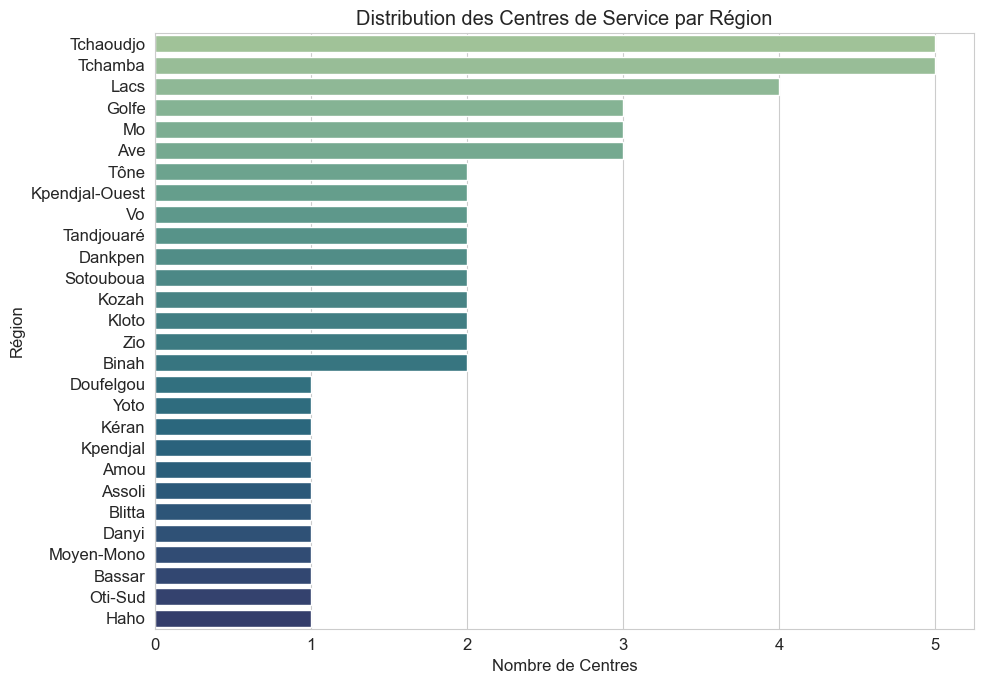

In [ ]:
# Visualisation 4.2 : Distribution des Centres par prefecture
plt.figure(figsize=(10, 7))
sns.countplot(data=df_centres, y='prefecture', order=df_centres['prefecture'].value_counts().index, palette='crest')
plt.title('Distribution des Centres de Service par Région')
plt.xlabel('Nombre de Centres')
plt.ylabel('Région')
plt.tight_layout()
plt.show()

Les prefecture Tchaoudjo et Tchamba qui sont des prefectures de la région centrale on le plus grand nombre de centre . 

C:\Users\RIG\AppData\Local\Temp\ipykernel_15064\2064595197.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cap_pref_total.values, y=cap_pref_total.index, palette='viridis')


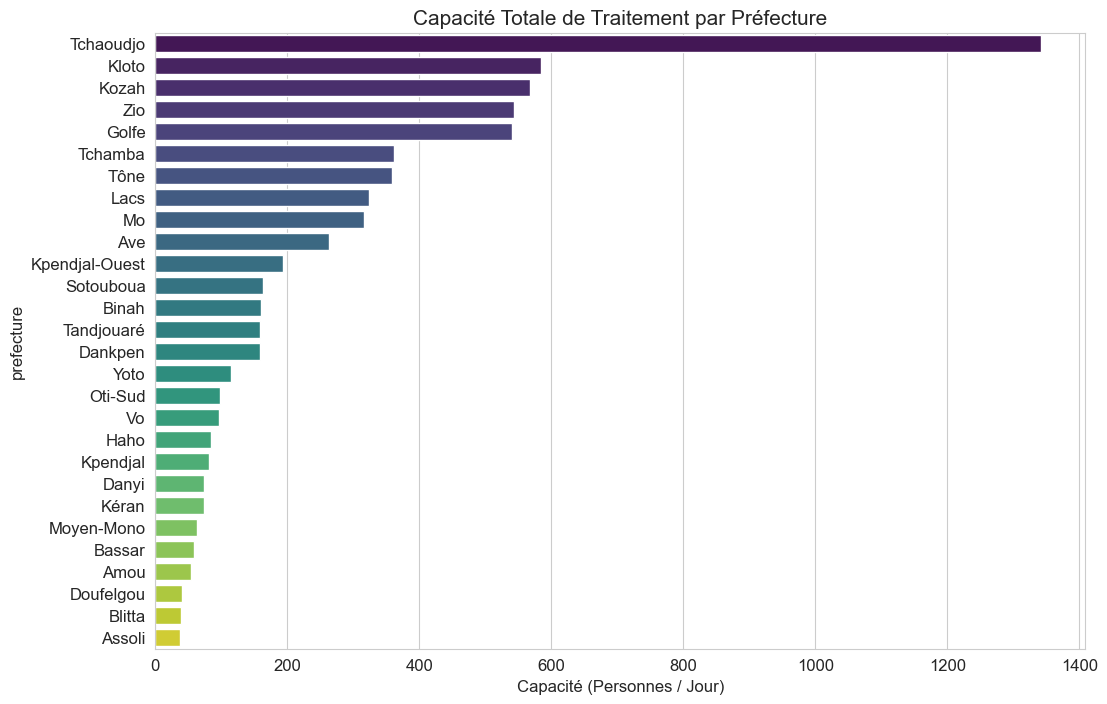

In [110]:
# Création d'un tableau pivot pour une lecture hiérarchisée

cap_pref_centre = df_centres.groupby(['prefecture', 'nom_centre'])['personnel_capacite_jour'].sum().unstack(fill_value=0)

# Visualisation par Bar Chart empilé pour comparer les préfectures entre elles
cap_pref_total = df_centres.groupby('prefecture')['personnel_capacite_jour'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=cap_pref_total.values, y=cap_pref_total.index, palette='viridis')
plt.title('Capacité Totale de Traitement par Préfecture', fontsize=15)
plt.xlabel('Capacité (Personnes / Jour)')
plt.show()

Kloto et Kozah : Ces préfectures ont des capacités très élevées (environ 550-600 pers/jour) mais ne disposent que de 2 centres chacune. Cette hyper-concentration crée des risques de goulots d'étranglement massifs.
Golfe et Zio : Avec seulement 2 ou 3 centres pour des zones fortement urbanisées, la pression par site est extrême.
L'exception Tchaoudjo : C'est la seule préfecture qui semble bien dotée avec la capacité la plus haute du pays (plus de 1300 pers/jour) répartie sur 5 centres. Elle doit servir de modèle pour le dimensionnement des autres pôles régionaux.

Certaines zones ont un nombre de centres correct mais une capacité de traitement dérisoire :

Mo et Ave : Elles possèdent 3 centres (autant que le Golfe !), mais leur capacité totale plafonne entre 250 et 300 pers/jour.

Optimisation : Plutôt que d'ajouter des sites, il faut augmenter le nombre de guichets et le personnel dans les structures existantes pour rentabiliser le maillage actuel.

CE qu'il faut faire :
Décentraliser : Créer des nouveaux sites dans Kloto et Kozah (fort volume, peu de sites).

Densifier : Augmenter les guichets dans Mo et Ave (nombre de sites suffisant, mais faible capacité).

Digitaliser : Puisque la majorité des centres ont un équipement "Partiel", toute extension physique doit s'accompagner d'une mise à niveau numérique pour garantir que la nouvelle capacité est réellement exploitable.

C:\Users\RIG\AppData\Local\Temp\ipykernel_15064\2366757683.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cap_pref_total.values, y=cap_pref_total.index, palette='viridis')


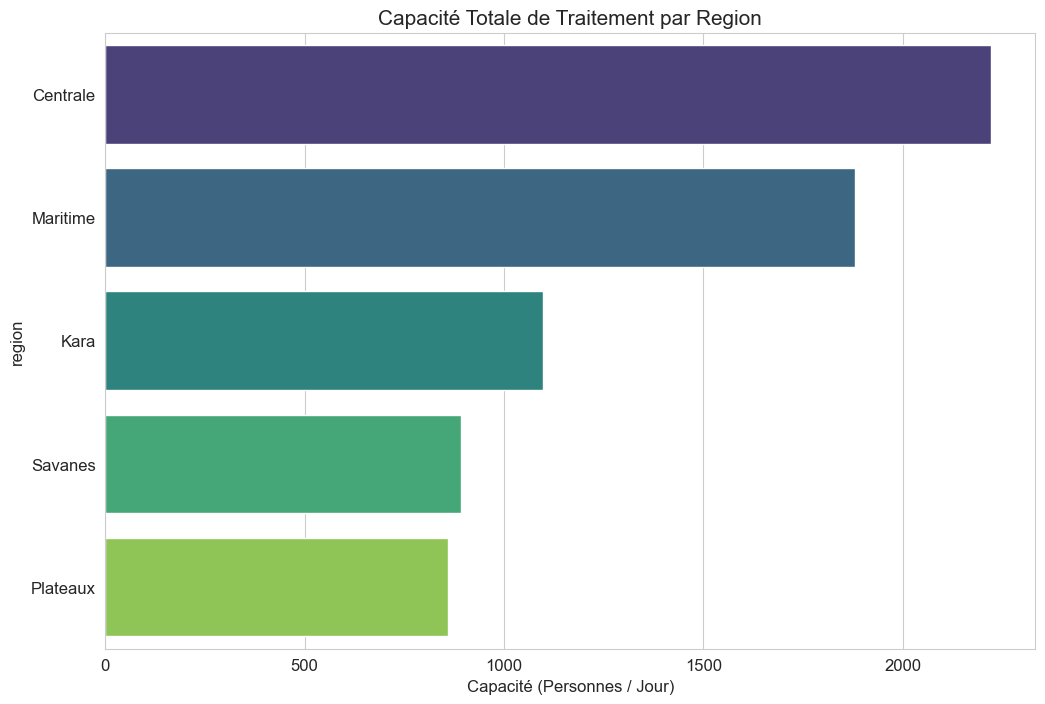

In [113]:
# Création d'un tableau pivot pour une lecture hiérarchisée

cap_pref_centre = df_centres.groupby(['region', 'nom_centre'])['personnel_capacite_jour'].sum().unstack(fill_value=0)

# Visualisation par Bar Chart empilé pour comparer les préfectures entre elles
cap_pref_total = df_centres.groupby('region')['personnel_capacite_jour'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=cap_pref_total.values, y=cap_pref_total.index, palette='viridis')
plt.title('Capacité Totale de Traitement par Region', fontsize=15)
plt.xlabel('Capacité (Personnes / Jour)')
plt.show()

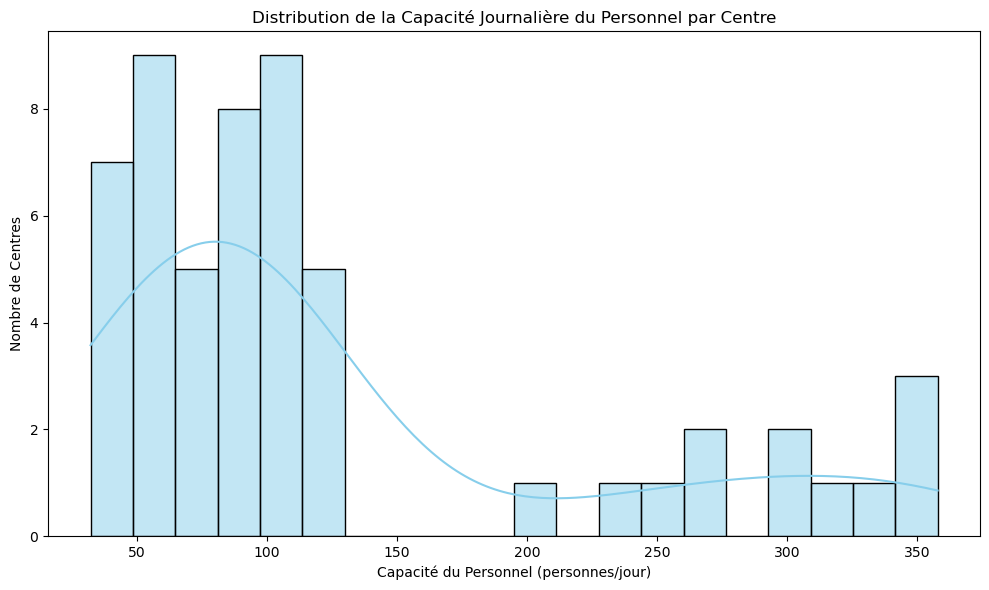

In [48]:
# Visualisation 4.3 : Capacité du Personnel
plt.figure(figsize=(10, 6))
sns.histplot(df_centres['personnel_capacite_jour'], bins=20, kde=True, color='skyblue')
plt.title('Distribution de la Capacité Journalière du Personnel par Centre')
plt.xlabel('Capacité du Personnel (personnes/jour)')
plt.ylabel('Nombre de Centres')
plt.tight_layout()
plt.show()

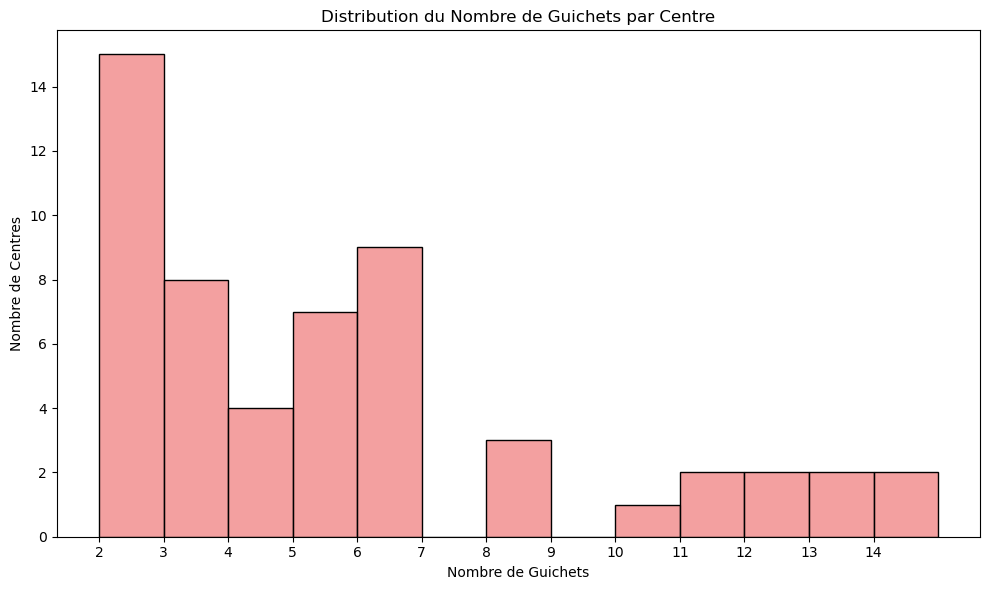

In [49]:
# Visualisation 4.4 : Nombre de Guichets
plt.figure(figsize=(10, 6))
sns.histplot(df_centres['nombre_guichets'], bins=range(int(df_centres['nombre_guichets'].min()), int(df_centres['nombre_guichets'].max()) + 2), kde=False, color='lightcoral')
plt.title('Distribution du Nombre de Guichets par Centre')
plt.xlabel('Nombre de Guichets')
plt.ylabel('Nombre de Centres')
plt.xticks(range(int(df_centres['nombre_guichets'].min()), int(df_centres['nombre_guichets'].max()) + 1))
plt.tight_layout()
plt.show()

C:\Users\RIG\AppData\Local\Temp\ipykernel_15064\1881903036.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_centres, y='statut_centre', palette='pastel')


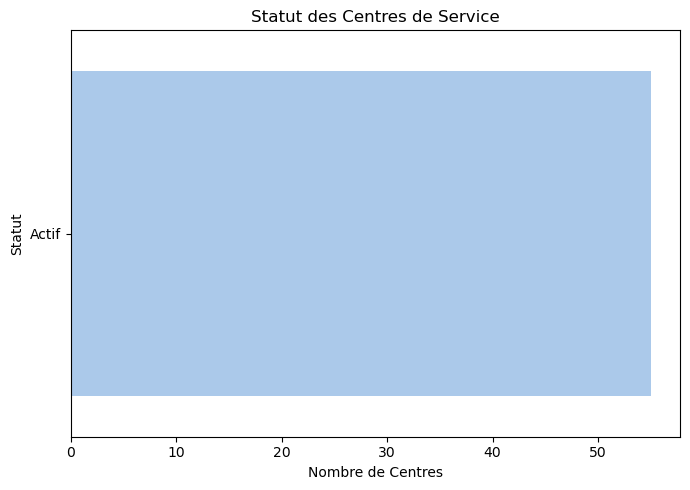

In [ ]:
# Visualisation 4.5 : Statut des Centres
plt.figure(figsize=(7, 5))
sns.countplot(data=df_centres, y='statut_centre', palette='pastel')
plt.title('Statut des Centres de Service')
plt.xlabel('Nombre de Centres')
plt.ylabel('Statut')
plt.tight_layout()
plt.show()

Tous les centres sont actifs 

**Analyse Spatiale**

In [62]:
import folium
from folium.plugins import MarkerCluster

# 1. Créer la carte centrée sur le Togo
# On utilise la latitude/longitude moyenne de vos données pour centrer la vue
togo_map = folium.Map(location=[df_centres['latitude'].mean(), df_centres['longitude'].mean()], 
                      zoom_start=7, 
                      tiles='OpenStreetMap')

# 2. Ajouter un cluster de marqueurs (optionnel, utile si les points sont proches)
marker_cluster = MarkerCluster().add_to(togo_map)

# 3. Ajouter chaque centre sur la carte
for idx, row in df_centres.iterrows():
    # Définition du contenu de la bulle d'info (popup)
    info_centre = f"""
    <b>Centre:</b> {row['nom_centre']}<br>
    <b>Type:</b> {row['type_centre']}<br>
    <b>Capacité:</b> {row['personnel_capacite_jour']} pers/jour<br>
    <b>Guichets:</b> {row['nombre_guichets']}
    """
    
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(info_centre, max_width=300),
        tooltip=row['nom_centre'], # Affiche le nom au survol
        icon=folium.Icon(color='green' if row['statut_centre'] == 'Actif' else 'red', icon='info-sign')
    ).add_to(marker_cluster)

# 4. Afficher la carte
map_togo.save("carte_togo_finale.html")
print("Carte enregistrée ! Ouvre le fichier 'carte_togo_finale.html' dans ton dossier.")


Carte enregistrée ! Ouvre le fichier 'carte_togo_finale.html' dans ton dossier.
